# Data loading and preprocessing
This tutorial aims to explain how to load and preprocess time-series data in order to built a Data object ready for the FPCMCI process.
We will cover the following parts:
* 1 - Loading data
    * 1.1 - by CSV file
    * 1.2 - by DataFrame
    * 1.3 - by NumPy array
* 2 - Preprocessing
    * 2.1 - Fill NaNs
    * 2.2 - Subsampling
        * 2.2.1 - Static
        * 2.2.2 - Dynamic Window
        * 2.2.3 - FFT Static Windonw
        * 2.2.4 - Static Windonw
* 3 - Plotting

<br>
First of all, we need to import Data from fpcmci:

In [2]:
from fpcmci.preprocessing.data import Data

## 1 - Loading data
FPCMCI presents three ways to load data:
* CSV file
* pandas DataFrame
* NumPy.array

### 1.1 - Loading data by CSV file

In [ ]:
df = Data('PATH_TO_CSV/FILE.csv')

Note that, by loading the data from a CSV file the Data object will assign to each time-series the name corresponding to column name in the CSV file. If you want to overwrite them and assign different names you can do as follows:

In [ ]:
df = Data('PATH_TO_CSV/FILE.csv', vars = ['A', 'B', 'C', 'D', 'E', 'F'])

### 1.2 - Loading data by pandas DataFrame

In [3]:
import numpy as np
import pandas as pd

T = 1500
N = 6
d = np.random.random(size = (T, N))
df = pd.DataFrame(d, columns = ['A', 'B', 'C', 'D', 'E', 'F'])

data = Data(df)

Note that, by loading the data from a DataFrame object the Data object will assign to each time-series the name corresponding to column name in the DataFrame. If you want to overwrite them and assign different names you can do as follows:

In [4]:
data = Data(df, vars = ['X', 'Y', 'Z', 'U', 'V', 'W'])

### 1.3 - Loading data by NumPy array

In [5]:
max_lag = 1
    
np.random.seed(1)
T = 1500
N = 6
d = np.random.random(size = (T, N))
for t in range(max_lag, T):
    d[t, 0] += 2 * d[t-1, 1] + 3 * d[t-1, 3]
    d[t, 2] += 1.1 * d[t-1, 1]**2
    d[t, 3] += d[t-1, 3] * d[t-1, 2]
    d[t, 4] += d[t-1, 4] + d[t-1, 5] * d[t-1, 0]
        
df = Data(d)

Note that, by loading the data from a NumPy array the Data object will assign a dummy name to each time-series (i.e. X_1, X_2, .., X_N). If you want to overwrite them and assign different names you can do as follows:

In [6]:
data = Data(d, vars = ['X', 'Y', 'Z', 'U', 'V', 'W'])

## 2 - Preprocessing

### 2.1 - Fill NaNs
By default, when Data object is created, it fills NaN value if they are present in the time-series data provided. You can disable this function by setting `fill_nan = False` as follows:

In [7]:
data = Data(d, vars = ['X', 'Y', 'Z', 'U', 'V', 'W'], fill_nan = False)

Note that NaN values raise errors in the FPCMCI process. Hence, be sure that they are **not** present in your data. 

### 2.2 - Subsampling
In this part, we will see 4 different ways to subsample the dataset before the FPCMCI analysis.

### 2.2.1 Static
This is the simplest way to subsample your dataset. You just need to define a number which defines the subsampling step. The algorithm takes 1 sample every STEP samples. You can define it directly in the Data object definition as follows:

In [8]:
from fpcmci.preprocessing.subsampling_methods.Static import Static

step = 2
data = Data(d, subsampling = Static(step))

In this way, 1 sample every 2 samples will be taken.

### 2.2.2 Dynamic Window
This method segments the dataset based on breakpoint analysis and for each segment (window) apply a entropy-based subsampling strategy. The latter tries to remove samples from each window as long as the difference between the entropy computed on the subsampled window and the original one is within the specified threshold.
<br><br>
You need to specify the `minimun window size` and the `entropy theshold`.

In [9]:
from fpcmci.preprocessing.subsampling_methods.WSDynamic import WSDynamic

min_window_size = 100
ent_thres = 0.1
data = Data(d, subsampling = WSDynamic(min_window_size, ent_thres))

### 2.2.3 FFT Static Window
This method computes the optimal window size based on the Fourier analysis applied to the time-series. Then, for each window applies a entropy-based subsampling strategy. The latter tries to remove samples from each window as long as the difference between the entropy computed on the subsampled window and the original one is within the specified threshold.
<br><br>
You need to specify the `sampling time` of the dataset and the `entropy theshold`.

In [10]:
from fpcmci.preprocessing.subsampling_methods.WSFFTStatic import WSFFTStatic

sampling_time = 0.01 # 100 Hz
ent_thres = 0.1
data = Data(d, subsampling = WSFFTStatic(sampling_time, ent_thres))

### 2.2.4 Static Window
This method takes in input the desired window size and, for each window applies a entropy-based subsampling strategy. The latter tries to remove samples from each window as long as the difference between the entropy computed on the subsampled window and the original one is within the specified threshold.
<br><br>
You need to specify the `window size` and the `entropy theshold`.

In [11]:
from fpcmci.preprocessing.subsampling_methods.WSStatic import WSStatic

window_size = 100
ent_thres = 0.3
data = Data(d, subsampling = WSStatic(window_size, ent_thres))

## 3 - Plotting

You can plot the time-series data by using the `plot_timeseries` method defined in Data class.

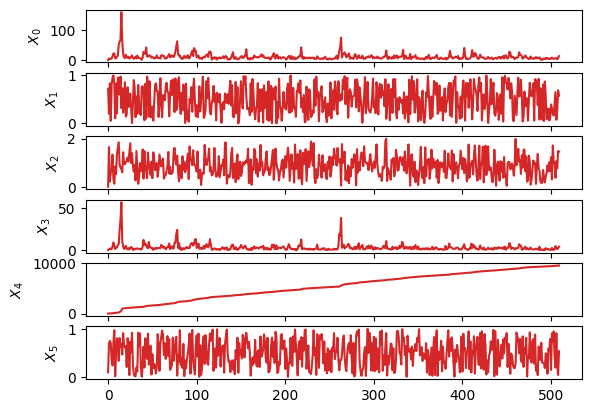

In [12]:
data.plot_timeseries()